In [31]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,chi2,mutual_info_classif

In [32]:
# Loading and reading data
df = pd.read_csv(r'C:\Users\FILI DANI\Downloads\archive (12)\BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [33]:
# Checking data quality 
print(df.isnull().sum())

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [34]:
# Removal of unnecessary columns (last two columns)
df = df.iloc[:,1:21]

In [35]:
# Analyzing unique values within categorical variables and computing mode
for col in df.columns:
    if df[col].dtype == type(object):
        print(f'Column Name: {col} \n Unique values: {df[col].unique()} \n Mode: {df[col].mode()} {df[col].value_counts(normalize=True).max()*100}\n')

Column Name: Attrition_Flag 
 Unique values: ['Existing Customer' 'Attrited Customer'] 
 Mode: 0    Existing Customer
Name: Attrition_Flag, dtype: object 83.934037720944

Column Name: Gender 
 Unique values: ['M' 'F'] 
 Mode: 0    F
Name: Gender, dtype: object 52.908067542213885

Column Name: Education_Level 
 Unique values: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'] 
 Mode: 0    Graduate
Name: Education_Level, dtype: object 30.8877258813074

Column Name: Marital_Status 
 Unique values: ['Married' 'Single' 'Unknown' 'Divorced'] 
 Mode: 0    Married
Name: Marital_Status, dtype: object 46.28221585859583

Column Name: Income_Category 
 Unique values: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] 
 Mode: 0    Less than $40K
Name: Income_Category, dtype: object 35.16342450873901

Column Name: Card_Category 
 Unique values: ['Blue' 'Gold' 'Silver' 'Platinum'] 
 Mode: 0    Blue
Name: Card_Category, dtype: objec

In [36]:
# Analyzing range of values in numerical variables and computing mean, median and mode
for col in df.columns:
    if df[col].dtype != type(object):
        print(f'Column Name: {col} \n Range of values: {df[col].min()} to {df[col].max()} \n Mean: {df[col].mean()} \n Median: {df[col].median()} \n Mode: {df[col].mode()} \n')

Column Name: Customer_Age 
 Range of values: 26 to 73 
 Mean: 46.32596030413745 
 Median: 46.0 
 Mode: 0    44
Name: Customer_Age, dtype: int64 

Column Name: Dependent_count 
 Range of values: 0 to 5 
 Mean: 2.3462032191172115 
 Median: 2.0 
 Mode: 0    3
Name: Dependent_count, dtype: int64 

Column Name: Months_on_book 
 Range of values: 13 to 56 
 Mean: 35.928409203120374 
 Median: 36.0 
 Mode: 0    36
Name: Months_on_book, dtype: int64 

Column Name: Total_Relationship_Count 
 Range of values: 1 to 6 
 Mean: 3.8125802310654686 
 Median: 4.0 
 Mode: 0    3
Name: Total_Relationship_Count, dtype: int64 

Column Name: Months_Inactive_12_mon 
 Range of values: 0 to 6 
 Mean: 2.3411671768539546 
 Median: 2.0 
 Mode: 0    3
Name: Months_Inactive_12_mon, dtype: int64 

Column Name: Contacts_Count_12_mon 
 Range of values: 0 to 6 
 Mean: 2.4553174681544387 
 Median: 2.0 
 Mode: 0    3
Name: Contacts_Count_12_mon, dtype: int64 

Column Name: Credit_Limit 
 Range of values: 1438.3 to 34516.0 

<AxesSubplot:xlabel='Total_Trans_Ct'>

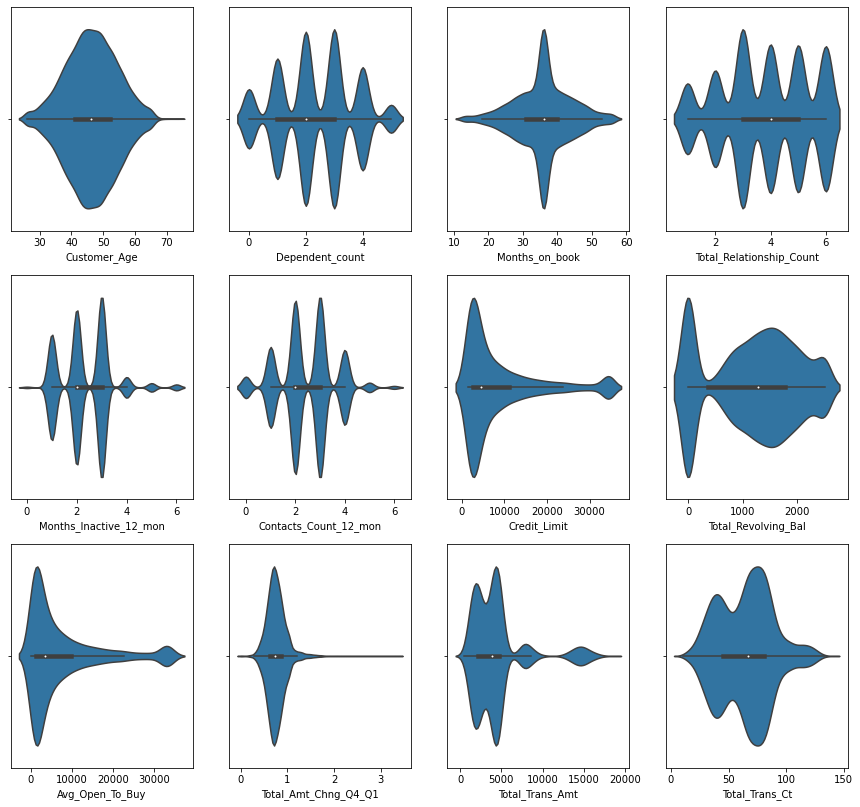

In [37]:
# Analyzing distribution of numerical features
fig , ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12)) = plt.subplots(3,4,figsize=(15,14))
sns.violinplot(data=df,x='Customer_Age',ax=ax1)
sns.violinplot(data=df,x='Dependent_count',ax=ax2)
sns.violinplot(data=df,x='Months_on_book',ax=ax3)
sns.violinplot(data=df,x='Total_Relationship_Count',ax=ax4)
sns.violinplot(data=df,x='Months_Inactive_12_mon',ax=ax5)
sns.violinplot(data=df,x='Contacts_Count_12_mon',ax=ax6)
sns.violinplot(data=df,x='Credit_Limit',ax=ax7)
sns.violinplot(data=df,x='Total_Revolving_Bal',ax=ax8)
sns.violinplot(data=df,x='Avg_Open_To_Buy',ax=ax9)
sns.violinplot(data=df,x='Total_Amt_Chng_Q4_Q1',ax=ax10)
sns.violinplot(data=df,x='Total_Trans_Amt',ax=ax11)
sns.violinplot(data=df,x='Total_Trans_Ct',ax=ax12)

<AxesSubplot:xlabel='Avg_Utilization_Ratio'>

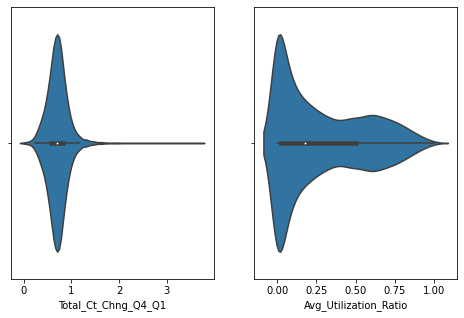

In [38]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(8,5))
sns.violinplot(data=df,x='Total_Ct_Chng_Q4_Q1',ax=ax1)
sns.violinplot(data=df,x='Avg_Utilization_Ratio',ax=ax2)

<AxesSubplot:xlabel='Avg_Open_To_Buy'>

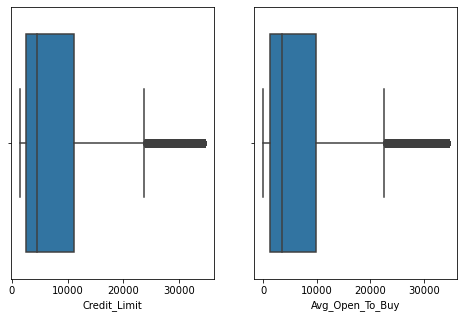

In [39]:
# Analyzing outliers via boxplots
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(8,5))
sns.boxplot(data=df,x='Credit_Limit',ax=ax1)
sns.boxplot(data=df,x='Avg_Open_To_Buy',ax=ax2)

In [40]:
# Identifying categorical columns
categorical_columns = []
for col in df.columns:
    if df[col].dtype == type(object):
        categorical_columns.append(df[col].name)
print(categorical_columns)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [41]:
# Handling categorical varibales (encoding)

# Encoding ordinal categorical columns
ordinal_categorical_columns = ['Education_Level','Income_Category','Card_Category']
def encoding_education_level(education_level):
    if education_level == 'Uneducated':
        return 0
    elif education_level == 'Unknown':
        return 1
    elif education_level == 'High School':
        return 2
    elif education_level == 'College':
        return 3
    elif education_level == 'Graduate':
        return 4
    elif education_level == 'Post-Graduate':
        return 5
    elif education_level == 'Doctorate':
        return 6
def encoding_income_category(income_category):
    if income_category == 'Unknown':
        return 0
    elif income_category == 'Less than $40K':
        return 1
    elif income_category == '$40K - $60K':
        return 2
    elif income_category == '$60K - $80K':
        return 3
    elif income_category == '$80K - $120K':
        return 4
    elif income_category == '$120K +':
        return 5
def encoding_card_category(card_category):
    if card_category == 'Blue':
        return 0
    elif card_category == 'Silver':
        return 1
    elif card_category == 'Gold':
        return 2
    elif card_category == 'Platinum':
        return 3
df['Education_Level'] = df['Education_Level'].apply(encoding_education_level)
df['Income_Category'] = df['Income_Category'].apply(encoding_income_category)
df['Card_Category'] = df['Card_Category'].apply(encoding_card_category)
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x:1 if x=='Attrited Customer' else 0)

# Label ecoding (nominal categorical columsn)
for col in df.columns:
    if df[col].dtype == type(object):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [42]:
# Splitting the dataset
x = df.iloc[:,1:]
y = df.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
# Applying feature selection
anova = SelectKBest(score_func=f_classif,k=19)
anova.fit(x_train,y_train)
chi2 = SelectKBest(score_func=chi2,k=19)
chi2.fit(x_train,y_train)
mutual_info = SelectKBest(score_func=mutual_info_classif,k=19)
mutual_info.fit(x_train,y_train)

SelectKBest(k=19,
            score_func=<function mutual_info_classif at 0x000002761B2C9550>)

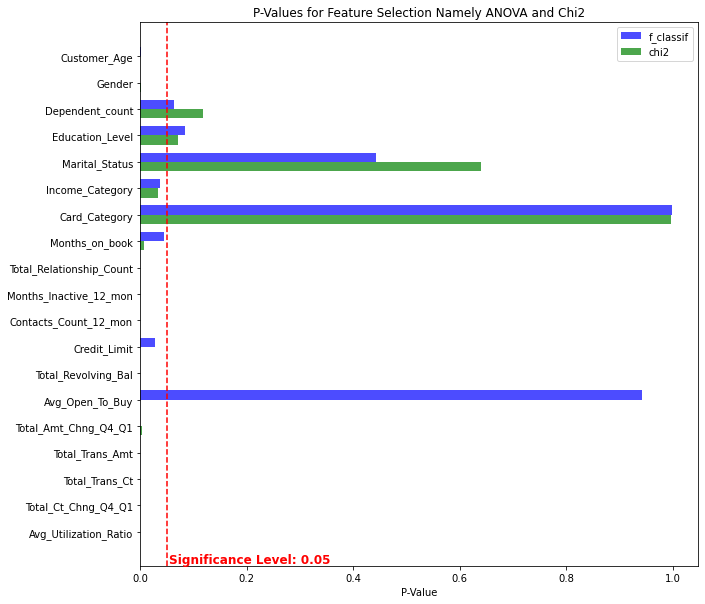

In [44]:
# Get the p-values for each feature selection method
p_values_f_classif = anova.pvalues_
p_values_chi2 = chi2.pvalues_

# Create a grouped horizontal bar plot for each feature's p-values with feature names
features = anova.get_feature_names_out()  # Use the first 19 feature names
width = 0.35
index = np.arange(len(features))

fig, ax = plt.subplots(figsize=(10, 10))
bar1 = ax.barh(index - width/2, p_values_f_classif, width, label='f_classif', color='b', alpha=0.7)
bar2 = ax.barh(index + width/2, p_values_chi2, width, label='chi2', color='g', alpha=0.7)

ax.set_xlabel('P-Value')
ax.set_yticks(index)
ax.set_yticklabels(features)
ax.set_title('P-Values for Feature Selection Namely ANOVA and Chi2')
ax.legend()
ax.axvline(x=0.05, color='r', linestyle='--', label='Significance Threshold')
ax.text(0.05 + 0.005, ax.get_ylim()[1] + 0.01, 'Significance Level: 0.05', color='r', ha='left', va='bottom', fontsize=12, fontweight='bold')

plt.gca().invert_yaxis()  # Invert y-axis for better visualization

plt.show()

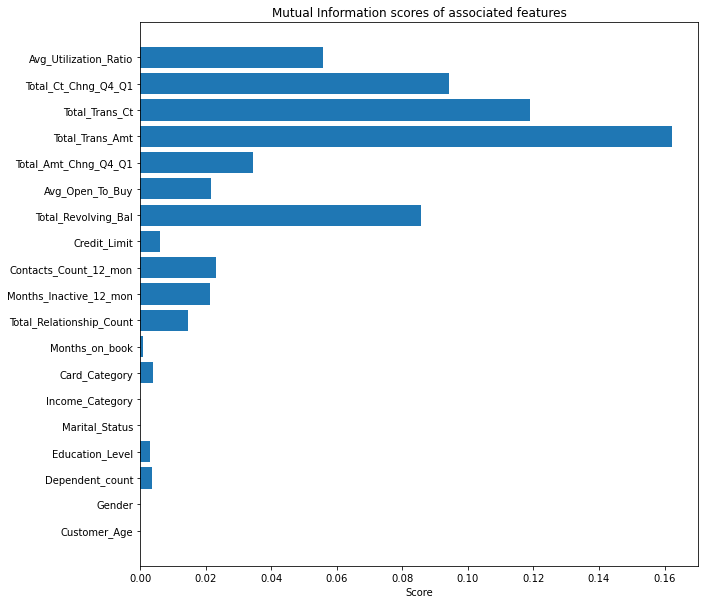

In [45]:
# Analyzing scores of mutual information 
fig , ax = plt.subplots(figsize=(10,10))
ax.barh(mutual_info.get_feature_names_out(),mutual_info.scores_)
ax.set_title('Mutual Information scores of associated features')
ax.set_xlabel('Score')
plt.show()